## Phase 1: Data preprocessing

<div style="border: 2px solid #ff0000ff; border-radius: 10px; padding: 10px; display: inline-block; width: 90%; box-sizing: border-box;">

- **Phase inputs**
	- Local data path : 'data_local = "../FBD_local_data/"'

- **Phase outputs**
	- `panel_1min.parquet`: Panel of stock financial informations
</div>

In [4]:
import polars as pl
from main_preprocessing import main_1

panel = main_1()

print(f"Panel shape: {panel.shape}")
print(f"\nPanel columns: {panel.columns}")
print(f"\nFirst few rows:")
panel.head()

Initializing data preprocessor...

Step 1: Processing/Loading cleaned assets...
PROCESSING 85 ASSETS
Date filter: 2008-09-01 to 2008-12-31
Files already cleaned: 78
Files to process: 7

Timestamp file already exists, loading it...


Assets to skip due to incomplete data coverage: 7
Assets: ['AA.N', 'DVN.N', 'MA.N', 'MS.N', 'NOV.N', 'PM.N', 'V.N']


Missing data report already exists, skipping analysis...


[1/85] Loading MDT.N... (already cleaned)
  Loaded: 3,322,742 rows

[2/85] Loading KFT.N... (already cleaned)
  Loaded: 3,858,623 rows

[3/85] Loading CL.N... (already cleaned)
  Loaded: 3,114,122 rows

[4/85] Loading EMR.N... (already cleaned)
  Loaded: 3,256,258 rows

[5/85] Loading VZ.N... (already cleaned)
  Loaded: 4,534,184 rows

[6/85] Loading CVX.N... (already cleaned)
  Loaded: 6,128,782 rows

[7/85] Loading IBM.N... (already cleaned)
  Loaded: 4,427,542 rows

[8/85] Loading TWX.N... (already cleaned)
  Loaded: 4,280,817 rows

[9/85] Loading DOW.N... (already cleaned)
  Load

timestamp,ticker,ask-price,ask-volume,bid-price,bid-volume,spread,mid-price,volume_imbalance
datetime[μs],str,f64,f64,f64,f64,f64,f64,f64
2008-09-02 13:30:00,"""ABT""",58.537504,605.0,58.309401,484.0,0.228103,58.423452,-0.111111
2008-09-02 13:30:00,"""ALL""",45.75773,163.0,45.637612,67.0,0.120118,45.697671,-0.417391
2008-09-02 13:30:00,"""BAC""",33.0075,13393.0,32.955497,8656.0,0.052003,32.981498,-0.21484
2008-09-02 13:30:00,"""BAX""",68.484787,328.0,68.272418,153.0,0.212368,68.378602,-0.363825
2008-09-02 13:30:00,"""BK""",35.3655,280.0,35.302484,153.0,0.063016,35.333992,-0.293303


In [5]:
print(panel['ticker'].unique())

shape: (78,)
Series: 'ticker' [str]
[
	"WAG"
	"UNH"
	"TXN"
	"MRK"
	"BHI"
	…
	"TWX"
	"USB"
	"MON"
	"KFT"
	"MMM"
]


## Phase 2: Formatting and NaN handling

<div style="border: 2px solid #ff0000ff; border-radius: 10px; padding: 10px; display: inline-block; width: 90%; box-sizing: border-box;">

- **Phase inputs**
	- `panel_1min.parquet`: Panel of stock financial informations

- **Phase outputs**
	- `stock_prices.csv`: DataFrame of asset prices, cleaned
	- `stock_returns.csv`: DataFrame of asset returns, cleaned
	- `stock_spreads.csv`: DataFrame of asset prices spreads, cleaned
</div>

In [6]:
from main_formatting import main_2
main_2(display_figures=False)

ENTERING PHASE 2: FORMATTING
2.1 Loading phase inputs
2.2 Table restructuring
  Build DataFrame of stock prices (pivoting panel by ticker aggregation)...
  Build DataFrame of stock spreads (pivoting panel by ticker aggregation)...
2.3 Missing values evaluation
  Forward-filling NaN values. Warning: Keeps first-entry NaN values.
  Cutting off the first day to remove first-entry NaN values...
2.4 Build DataFrame of stock returns (pct changes of prices)
2.5 Writing .csv files at [../FBD_local_data/]
  3 files successfully written.

PHASE 2 CORRECTLY TERMINATED



## Phase 3: Clustering pipeline

<div style="border: 2px solid #ff0000ff; border-radius: 10px; padding: 10px; display: inline-block; width: 90%; box-sizing: border-box;">

- **Phase inputs**
	- `stock_returns.csv`: DataFrame of asset prices, cleaned

- **Phase outputs**
	- No data outputs
</div>

In [7]:
from main_clustering import main_3
main_3(create_plots=False, show_individual_plots=False)

ENTERING PHASE 3: CLUSTERING PIPELINE
3.1 Loading stock returns...
  Loading + structuring 'stock_returns.csv'...
  Input data shape: (33546, 78)
  Number of stocks: 78
  Number of time periods: 33546
3.2 Running clustering methods
  Each method uses its own built-in correlation matrix cleaning.

  1. Running Leiden Clustering...
   Leiden: 4 clusters identified

  2. Running Louvain Clustering...
   Louvain: 5 clusters identified

  3. Running Marsili-Giada Clustering...


/Users/timot/Desktop/FBD2025/utils/clustering_utils/Marsili_Giada_clustering.py:38: RuntimeWarning: invalid value encountered in log
  return np.log(n / c) + (n - 1) * np.log((n * n - n) / (n * n - c))


 HALF CLUSTER  Lc.new > max(Lc.old)
Lc.new <= max(Lc.old), exiting
   Marsili-Giada: 38 clusters identified

  4. Running Industry-based Clustering...
   Industry: 14 clusters identified
3.3 Create output DataFrame

Clustering Results Summary:
     Leiden_Cluster  Louvain_Cluster  Marsili_Giada_Cluster  Industry_Cluster
ABT               2                0                      0                 5
AEP               1                3                      1                13
ALL               3                2                      2                 7
APA               0                1                      3                 2
AVP               1                3                      4                 7
AXP               3                2                      5                 3
BA                0                4                      6                 6
BAC               1                3                      7                 3
BAX               2                0                  

,Leiden_Cluster,Louvain_Cluster,Marsili_Giada_Cluster,Industry_Cluster
ABT,2,0,0,5
AEP,1,3,1,13
ALL,3,2,2,7
APA,0,1,3,2
AVP,1,3,4,7
...,...,...,...,...
WMB,0,1,0,2
WMT,0,4,7,9
WY,1,3,17,7
XOM,0,1,55,2


## Phase 4: Application to Pairs Trading
<div style="border: 2px solid #ff0000ff; border-radius: 10px; padding: 10px; display: inline-block; width: 90%; box-sizing: border-box;">

- **Phase inputs**
	- `stock_prices.csv`: DataFrame of asset prices, cleaned
	- `stock_returns.csv`: DataFrame of asset returns, cleaned
	- `stock_spreads.csv`: DataFrame of asset prices spreads, cleaned

- **Phase outputs**
	- No data outputs, only graphical and numerical results

- **Note**
	- In addition to functions and classes defined in the `trading` folder, Phase 4 also imports the function `run_louvain` (defined in Phase 3).
</div>

ENTERING PHASE 4: TRADING STRATEGY IMPELMENTATION
4.1 Loading phase inputs...
  Loading + structuring 'stock_prices.csv'...
  Loading + structuring 'stock_returns.csv'...
  Loading + structuring 'stock_spreads.csv'...
4.2 Building DATA master dictionary...
  use_SUBDATA = False -> Using full data range
  Succesfully built DATA dictionary.
4.3 Implementing rolling clustering approach...
  Clustering will be recalculated every 300 timestamps
  Successfully initialized empty positions table, shape:(33546, 79)
  Total timestamps: 33546, Number of rolling windows: 111

  === Rolling Window 1/111 ===
  Clustering period: t=0 to t=299
  Trading period: t=300 to t=599
  Starting Louvain clustering...
    Louvain clustering done. Generated 3 clusters for this window
  Constructed 549 pairs, evaluating 549 pairs
    Evaluating pair 50/549: AVP-UPS
    Evaluating pair 100/549: CL-WAG
    Evaluating pair 150/549: EMC-F
    Evaluating pair 200/549: EXC-T
    Evaluating pair 250/549: HD-S
    Evalua

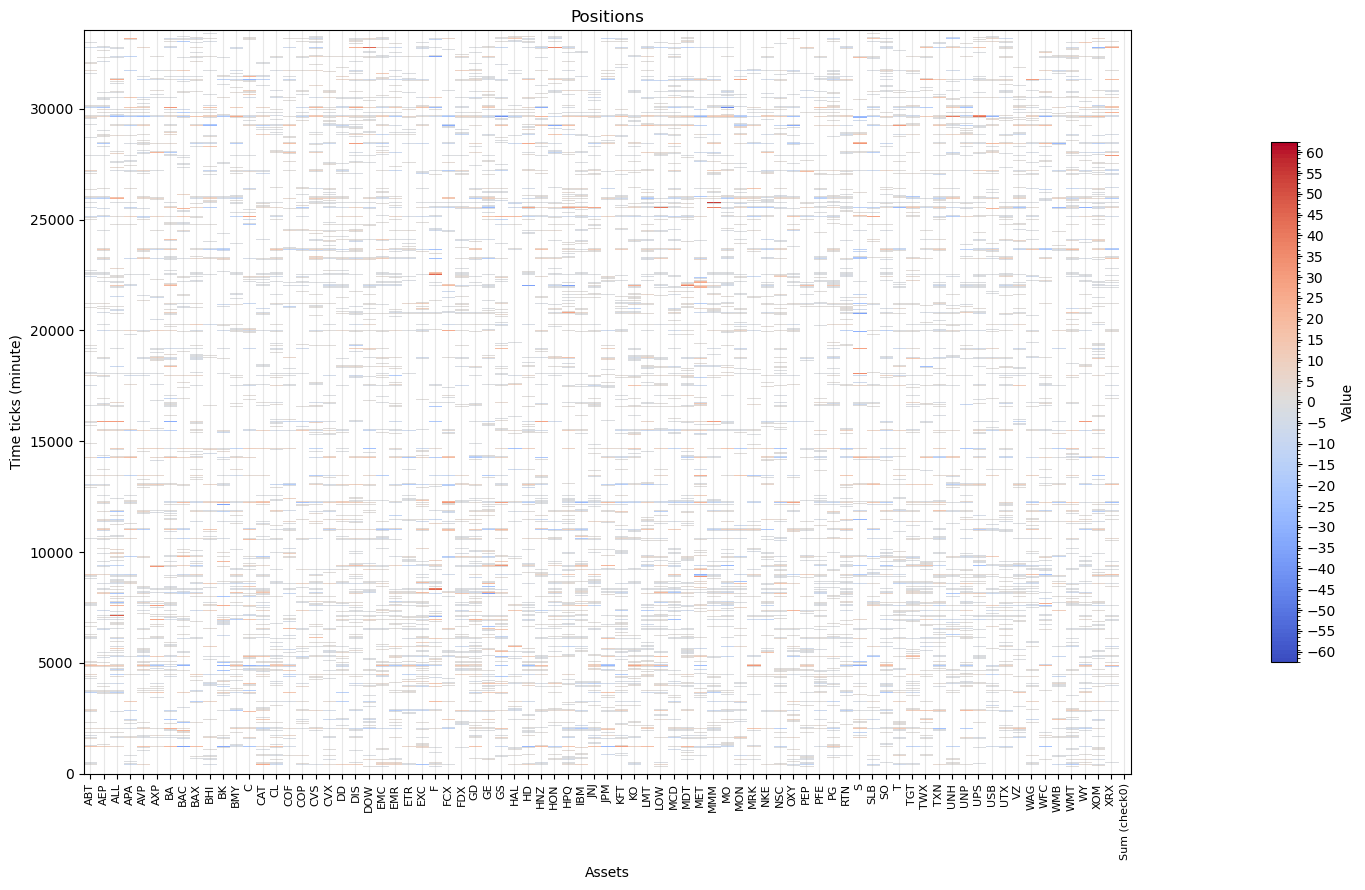

4.5 Strategy statistics
  The strategy processed...
  • 78 assets
  • over a total of 33546 time ticks
  • 111 complete clustering/trading cycles
  • an average of 658 pairs per window
  • resulting in a total of 21911400 pair-timestamp evaluations
4.6 Computing PNL series...


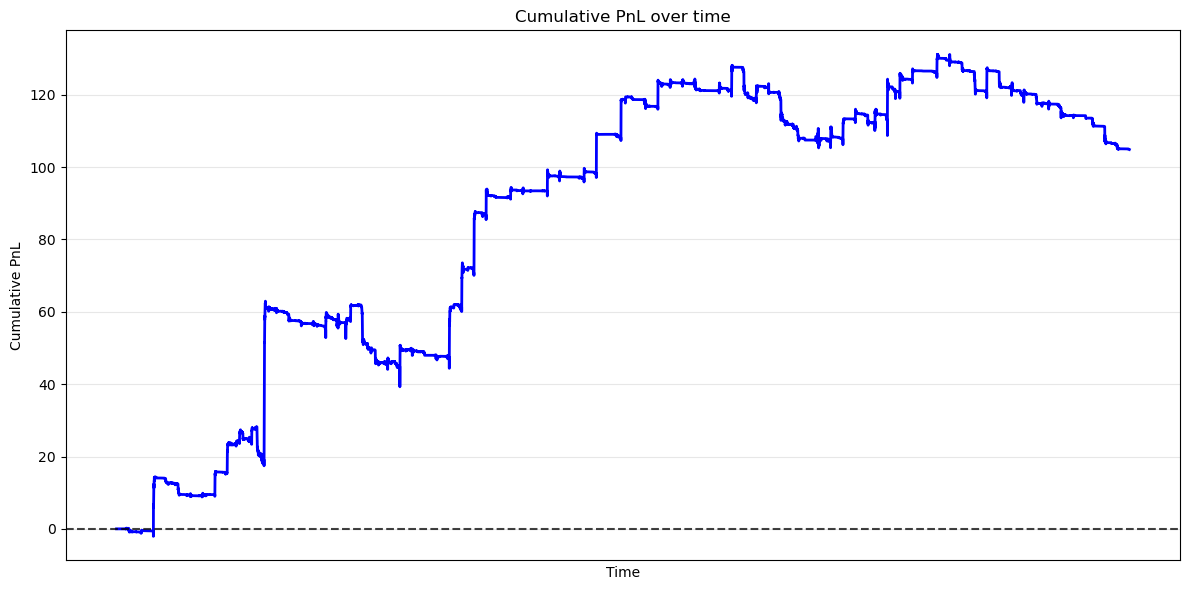


PHASE 4 CORRECTLY TERMINATED



In [9]:
from main_trading import main_4
main_4(window_clustering= 300,
       window_lookback= 50,
       lambda_in = 3,
       lambda_out = 0.5,
       lambda_emergency = 3,
       patience_max = 120,
       use_SUBDATA = False,
       nb_pairs_cap=-1,  # Use -1 to use all pairs
       plot_pairs_lifetimes=False,
       display_figures=True)